# Text Classification:

## 1.1- About Dataset
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

##1.2 - sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

##1.3 - Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

<pre>
<font color='blue'><b>12.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>13.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>14.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>15.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>16.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>17.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

##1.3 - Models:

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.



</pre>

### Model-1: Using 1D convolutions with word embeddings

<pre>
<b>Encoding of the Text </b> --> For a given text data create a Matrix with Embedding layer as shown Below. 
In the example we have considered d = 5, but in this assignment we will get d = dimension of Word vectors we are using.
 i.e if we have maximum of 350 words in a sentence and embedding of 300 dim word vector, 
 we result in 350*300 dimensional matrix for each sentance as output after embedding layer
<img src='https://i.imgur.com/kiVQuk1.png'>
Ref: https://i.imgur.com/kiVQuk1.png

<b>Reference:</b>
<a href='https://stackoverflow.com/a/43399308/4084039'>https://stackoverflow.com/a/43399308/4084039</a>
<a href='https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/'>https://missinglink.ai/guides/keras/keras-conv1d-working-1d-convolutional-neural-networks-keras/</a>

<b><a href='https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work'>How EMBEDDING LAYER WORKS </a></b>

</pre>

### Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

<img src='https://i.imgur.com/fv1GvFJ.png'>
ref: 'https://i.imgur.com/fv1GvFJ.png'

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

<img src='https://i.imgur.com/EuuoJtr.png'>

##1.4 - File Handling of RAR files:

In [ ]:
pip install rarfile

In [ ]:
import regex as re
import numpy as np
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import rarfile
import pandas as pd
import tensorflow as tf
import os


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##1.4 - Implementation of Preprocessing:

##1.4.1 - Decontracting:

In [ ]:
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

##1.4.2 - Chunking:

In [11]:
#chunking
import regex as re
import nltk 
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')


def chunking(processing_text):
      chunks=(list(nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(processing_text)))))
      for i in chunks:
          if type(i)==nltk.tree.Tree:
              if i.label() == "GPE":
                  j = i.leaves()
                  if len(j)>1:   #if new_delhi or bigger name
                      gpe = "_".join([term for term,pos in j])
                      processing_text = re.sub(rf'{j[1][0]}',gpe,processing_text, flags=re.MULTILINE)              #replacing delhi with new_delhi
                      processing_text = re.sub(rf'\b{j[0][0]}\b',"",processing_text, flags=re.MULTILINE)       #deleting new, \b is important
              if i.label()=="PERSON":
                for term,pog in i.leaves():
                  processing_text = re.sub(re.escape(term),"",processing_text, flags=re.MULTILINE)
      return processing_text               


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [17]:
#i am living in the New York
print("i am living in the New York -->",chunking('i am living in the New York'))
print(" ")
print("-"*50)
print(" ")
#My name is Praveen Kumar
print("My name is Praveen Kumar -->", chunking('My name is Praveen Kumar'))

i am living in the New York --> i am living in the  New_York
 
--------------------------------------------------
 
My name is Praveen Kumar --> My name is  


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

##1.4.3 - Preprocessing function for all the preprocessing:

In [ ]:
def preprocessing(text):
     #(1)for extracting email after "@"
      txt=[]
      emails=re.findall("@([a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)",text)
      for i in emails:
        word_list = re.split(r"\.",i)
        for i in word_list:
          if len(i)>2 and i != "com":
            txt.append(i)
      email_txt= ' '.join(txt)

      #(2)for extarcting subject
      
      sub_space=re.findall("^Subject:(.*$)",text,re.MULTILINE)  
      sub_space=re.sub("\W"," ",sub_space[0])
      sub_space=re.sub("re","",sub_space,flags=re.IGNORECASE)
      sub_space= re.sub(r" {2,}", " ", sub_space, flags=re.MULTILINE)
      


      #(3)replacing mail id with space
      processing_text=re.sub("([a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+)","",text)

      #(4)replacing subject sentence with space  
      processing_text=re.sub("^Subject:.*$","",processing_text,flags=re.MULTILINE)
      
      #(5)to remove the sentence starts with "From: or Write to:""
      processing_text= re.sub(r"Write to:.*$","",processing_text, flags=re.MULTILINE|re.IGNORECASE)           
      processing_text= re.sub(r"From:.*$","",processing_text, flags=re.MULTILINE|re.IGNORECASE)               
      processing_text= re.sub(r"or:","",processing_text,flags=re.MULTILINE|re.IGNORECASE)

      #(6)to remove words in b/w <>
      processing_text=re.sub('(<[^<>]+>)','',processing_text)

      #(7)reomove words in bracket
      processing_text=re.sub("\(.*\)"," ",processing_text)

      #(8)to remove symbols
      processing_text= re.sub(r"[\n\t\-\\\/]"," ",processing_text, flags=re.MULTILINE)

      #(9)to remove words end with ":"
      processing_text=re.sub("([a-zA-Z0-9-]+:)","",processing_text)

      #(10)Decontraction
      processing_text=decontracted(processing_text)

      #chunking
      processing_text=chunking(processing_text)


      #(12)to remove numbers
      processing_text=re.sub("\d+","",processing_text)

      #(13)to remove the "_" on words
      processing_text= re.sub(r"\b_([a-zA-z]+)_\b",r"\1",processing_text) 
      processing_text= re.sub(r"\b_([a-zA-z]+)\b",r"\1",processing_text) 
      processing_text= re.sub(r"\b([a-zA-z]+)_\b",r"\1",processing_text) 

      #(14)to remove words dr in dr_berlin
      processing_text= re.sub(r"\b[a-zA-Z]{1}_([a-zA-Z]+)",r"\1",processing_text) 
      processing_text= re.sub(r"\b[a-zA-Z]{2}_([a-zA-Z]+)",r"\1",processing_text)

      #(15)convert to lowercase
      processing_text= processing_text.lower()

      #(16)words will be only b/w of size "2" to "15"
      processing_text= re.sub(r'\b\w{1,2}\b'," ",processing_text) #remove words <2
      processing_text= re.sub(r"\b\w{15,}\b"," ",processing_text) #remove words >15

      #(17)having only data of alphabets and "_"
      processing_text= re.sub(r"[^a-zA-Z_]"," ",processing_text)

      #(18)removing all unnecessary space
      processed_text= re.sub(r" {2,}", " ",processing_text, flags=re.MULTILINE)
      
      return email_txt,sub_space,processed_text

     
      

##1.4.4 - Implementing Preprocessing on our Dataset:

In [ ]:
label,doc_num,text=[],[],[]
processed_mail,processed_subject,processed_text=[],[],[]


with rarfile.RarFile("/content/drive/MyDrive/Colab Notebooks/documents.rar") as rf:
  for name in rf.namelist():
#for extracting the "CLASS" and "Document Number" from the text files
    try:
      filename=re.findall('documents/([a-zA-Z0-9-_.]+)\.txt',name)[0]
      i,j = filename.split('_')
      j = int(j.split('.')[0])
      label.append(i)
      doc_num.append(j)
    except:
      pass #for directory path "documentary/" in the "rf.namelist()"  which has to be skipped since it is not a file but it also comes in the rf.namelist()
    
#for pre-processing the given text file
    try:
      with rf.open(name) as f:
        my_file=f.read()
        text.append(my_file)
        corct=my_file.decode('ISO-8859-1') #for decoding the "bytes" type to "string" type.
        pre_processed=preprocessing(corct)
        processed_mail.append(pre_processed[0])
        processed_subject.append(pre_processed[1])
        processed_text.append(pre_processed[2])
    except:
      pass #for directory path "documentary/" in the "rf.namelist()"  which has to be skipped since it is not a file but it also comes in the rf.namelist()

In [ ]:
len(processed_mail)
len(processed_subject)
len(processed_text)

18828

In [ ]:
#checking
with rf.open('documents/alt.atheism_49960.txt') as f:
  chk_file=f.read()
  chk_corct=chk_file.decode('ISO-8859-1')
  checking=preprocessing(chk_corct)



In [ ]:
checking[0] #'alt.atheism_49960.txt' processed email

'mantis netcom mantis'

In [ ]:
checking[1] #'alt.atheism_49960.txt' processed subject

' Alt Atheism FAQ Atheist sources'

In [ ]:
checking[2] #'alt.atheism_49960.txt' processed text

' archive atheism resources alt atheism archive resources last december atheist resources addresses atheist organizations usa freedom from religion foundation fish bumper stickers and assorted other atheist paraphernalia are available from the freedom from religion foundation the evolution designs evolution designs sell the fish fish symbol like the ones stick their cars but with feet and the word written inside the deluxe moulded plastic fish postpaid the people the san francisco bay area can get from try mailing for net people who directly the price per fish american atheist press aap publish various atheist books critiques the bible lists biblical contradictions and one such book the bible handbook and american atheist isbn edition bible contradictions absurdities atrocities immoralities contains the bible contradicts itself aap based the king version the bible austin prometheus books sell books including holy horrors alternate address prometheus african americans for humanism organ

##1.5 - Preprocessed Dataset:

In [ ]:
df=pd.DataFrame([text,label,processed_text,processed_subject,processed_mail],['Text', 'Class', 'preprocessed_text', 'preprocessed_subject','preprocessed_emails']).T

In [ ]:
df.head()

,Text,Class,preprocessed_text,preprocessed_subject,preprocessed_emails
0,b'From: mathew <mathew@mantis.co.uk>\nSubject:...,alt.atheism,archive atheism resources alt atheism archive...,Alt Atheism FAQ Atheist sources,mantis netcom mantis
1,b'From: mathew <mathew@mantis.co.uk>\nSubject:...,alt.atheism,rchive atheism introduction atheism archive i...,Alt Atheism FAQ Introduction to Atheism,mantis mantis mantis
2,b'From: I3150101@dbstu1.rz.tu-bs.de (Benedikt ...,alt.atheism,article well has quite different not necessar...,Gospel Dating,dbstu1 tu-bs mimsy umd edu umd edu
3,b'From: mathew <mathew@mantis.co.uk>\nSubject:...,alt.atheism,recently ras have been ordered and none have ...,university violating separation of church state,mantis kepler unh edu
4,b'From: strom@Watson.Ibm.Com (Rob Strom)\nSubj...,alt.atheism,article however hate economic terrorism and p...,soc motss et al Princeton axes matching funds...,Watson Ibm Com harder ccr-p ida org harder ccr...


In [ ]:
#REFERENCE:https://stackoverflow.com/questions/33098383/merge-multiple-column-values-into-one-column-in-python-pandas

df['Combined'] = df[df.columns[2:]].apply(
    lambda x: ','.join(x.dropna().astype(str)),
    axis=1)

##1.5.1 - Splitting Dataset for Implementing the models:

In [ ]:
X=df['Combined']
Y=df['Class']
labels=np.unique(Y)
Y_label=[]
for i in Y:
  if i in labels:
    y=np.where(labels == i)
    Y_label.append(y[0][0])
from tensorflow.keras.utils import to_categorical
Y_label = to_categorical(np.asarray(Y_label))


In [ ]:
len(Y_label)

18828

##1.5.2 - Shuffling the Data:

In [ ]:
# Shuffle the data
seed = 1337
rng = np.random.RandomState(seed)
rng.shuffle(X)
rng = np.random.RandomState(seed)
rng.shuffle(Y_label)

##1.5.3 - Train and Test Data split:

In [ ]:
# Extract a training & validation split
validation_split = 0.25
num_validation_samples = int(validation_split * len(X))
X_train = X[:-num_validation_samples]
X_test = X[-num_validation_samples:]
Y_train = Y_label[:-num_validation_samples]
Y_test = Y_label[-num_validation_samples:]

# 2-Implementation of the Models

In [ ]:
pip install -q --no-deps tensorflow-addons~=0.6

     |████████████████████████████████| 686kB 7.6MB/s 


In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow_addons.metrics import F1Score
%load_ext tensorboard
import datetime

<h1>2.1.Word Level Embedding<h1>

<h3>2.1.1-Tokenization<h3>

In [ ]:
#In Tokenization i have removed "_" from the filters argument so it won't removes it during tokenization
tk=tf.keras.preprocessing.text.Tokenizer(num_words=20000,filters='!"#$%&()*+,-./:;<=>?@[\\]^`{|}~\t\n',lower=True,split=" ",char_level=False,oov_token=None,document_count=0)
tk.fit_on_texts(X_train)
vocab_size = len(tk.word_index) + 1
# integer encode the documents
encoded_docs_train = tk.texts_to_sequences(X_train)
encoded_docs_test = tk.texts_to_sequences(X_test)

<h3>2.1.2-Padding<h3>

In [ ]:

#By giving "maxlen" argument of "pad_sequences" the "default" value it will adjust the pad sequence according do the document 
#which has the maximum number of words so i had given the default value of "maxlen"

padded_docs_train = pad_sequences(encoded_docs_train,maxlen=1000,padding='post')
padded_docs_test = pad_sequences(encoded_docs_test,maxlen=1000, padding='post')
padded_docs_train = np.array(padded_docs_train, dtype='float32')
padded_docs_test = np.array(padded_docs_test, dtype='float32')

<h3>2.1.3-Downloading the "Glove Vector"<h3>

In [ ]:
#downloading pre-trained GloVe embeddings (a 822M zip file)-100 dimensional

!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2021-05-26 11:32:36--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2021-05-26 11:32:36--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2021-05-26 11:32:36--  http://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6

<h3>2.1.4-Mapping the "Glove Vectors"<h3>

In [ ]:
#making a dict mapping words (strings) to their NumPy vector representation:

path_to_glove_file = '/content/glove.6B.100d.txt'
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))
embedding_dim=100

Found 400000 word vectors.


<h3>2.1.5-Preparing the "Embedding Layer"<h3>

In [ ]:
# Prepare embedding matrix
embedding_matrix = np.zeros((vocab_size,embedding_dim))
for word, i in tk.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector

In [ ]:
#"trainable=False " =>"Don't train any word vectors while Training the model."
embedding_layer = Embedding(vocab_size,embedding_dim,embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),trainable=False)
 

<h3>2.1.6-Call Back For Tensorboard<h3>

In [ ]:
# Clear any logs from previous runs
!rm -rf ./logs/
#Clear any model_save from previous runs
!rm -rf ./model_save/
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_summary_writer = tf.summary.create_file_writer(log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)


<h3>2.1.7-Call Back For saving model weights<h3>

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = '/content/sample_data'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "best_model_1.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,monitor='acc',verbose=0, save_best_only=True,save_freq='epoch',save_weights_only=True)


<h1>2.2 -> MODEL-1<h1>

In [ ]:
#REFERENCE:https://stackoverflow.com/questions/56918388/error-valueerror-the-last-dimension-of-the-inputs-to-dense-should-be-defined

#MODEL-1

int_sequences_input = Input(shape=(1000,))
embedded_sequences = embedding_layer(int_sequences_input)
Conv1_1 = Conv1D(128, 5, activation="relu")(embedded_sequences)
Conv1_2 = Conv1D(100, 5, activation="relu")(embedded_sequences)
Conv1_3 = Conv1D(100, 5, activation="relu")(embedded_sequences)
merge_1=concatenate([Conv1_1,Conv1_2,Conv1_3])
Maxpool_1 = MaxPooling1D()(merge_1)
Conv2_1 = Conv1D(128, 5, activation="relu")(Maxpool_1)
Conv2_2 = Conv1D(100, 5, activation="relu")(Maxpool_1)
Conv2_3 = Conv1D(100, 5, activation="relu")(Maxpool_1)
merge_2=concatenate([Conv2_1,Conv2_2,Conv2_3])
Maxpool_2 = MaxPooling1D()(merge_2)
Conv3 = Conv1D(100, 5, activation="relu")(Maxpool_2)
flat1 = Flatten()(Conv3)
Drop= Dropout(0.5)(flat1)
Dense_1 = Dense(512, activation="relu")(Drop)
output = Dense(len(labels), activation="softmax")(Dense_1)
model = Model(inputs=int_sequences_input, outputs=output)

<h3>MODEL-1 Summary<h3>

In [ ]:
# summarize layers
print(model.summary())


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 1000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 1000, 100)    7336600     input_2[0][0]                    
__________________________________________________________________________________________________
conv1d_7 (Conv1D)               (None, 996, 128)     64128       embedding[1][0]                  
__________________________________________________________________________________________________
conv1d_8 (Conv1D)               (None, 996, 100)     50100       embedding[1][0]                  
____________________________________________________________________________________________

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["acc",F1Score(num_classes=len(labels ), average="micro")])

model.fit(padded_docs_train, Y_train, batch_size=128, epochs=5, validation_data=(padded_docs_test, Y_test),callbacks=[checkpoint_callback,tensorboard_callback])

Epoch 1/5
111/111 [==============================] - 1050s 9s/step - loss: 2.8650 - acc: 0.1379 - f1_score: 0.1379 - val_loss: 2.0634 - val_acc: 0.2728 - val_f1_score: 0.2728
Epoch 2/5
111/111 [==============================] - 1022s 9s/step - loss: 1.7758 - acc: 0.3873 - f1_score: 0.3873 - val_loss: 1.4645 - val_acc: 0.5141 - val_f1_score: 0.5141
Epoch 3/5
111/111 [==============================] - 1032s 9s/step - loss: 1.2367 - acc: 0.5805 - f1_score: 0.5805 - val_loss: 1.1188 - val_acc: 0.6180 - val_f1_score: 0.6180
Epoch 4/5
111/111 [==============================] - 1031s 9s/step - loss: 0.9311 - acc: 0.6842 - f1_score: 0.6842 - val_loss: 1.1094 - val_acc: 0.6204 - val_f1_score: 0.6204
Epoch 5/5
111/111 [==============================] - 978s 9s/step - loss: 0.7030 - acc: 0.7558 - f1_score: 0.7558 - val_loss: 1.2152 - val_acc: 0.6512 - val_f1_score: 0.6512


In [ ]:
%tensorboard --logdir logs/fit

<h1>3 -> MODEL-2<h1>

<h1>3.1.Character Level Embedding<h1>

<h3>3.1.1-Tokenization<h3>

In [ ]:
tk = tf.keras.preprocessing.text.Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(X_train)

<h3>3.1.2-Assigning integers for the characters <h3>

In [ ]:
#REFERENCE:https://towardsdatascience.com/character-level-cnn-with-keras-50391c3adf33

# construct a new vocabulary (i.e) assigning the integers to each and every character
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

<h3>3.1.3-Tokenizing after character assigning  and padding <h3>

In [ ]:
# Convert string to index
train_sequences = tk.texts_to_sequences(X_train)
test_texts = tk.texts_to_sequences(X_test)

# Padding
train_data = pad_sequences(train_sequences, maxlen=1500, padding='post')
test_data = pad_sequences(test_texts, maxlen=1500, padding='post')

# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')

<h3>3.1.4-Mapping the "Glove Vectors" of the characters<h3>

In [ ]:
#making a dict mapping words (strings) to their NumPy vector representation:

path_to_glove_file = '/content/drive/MyDrive/glove.840B.300d-char.txt'
embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Found %s word vectors." % len(embeddings_index))
embedding_dim=300

Found 94 word vectors.


<h3>3.1.5-Preparing the "Embedding Layer"<h3>

In [ ]:
# Prepare embedding matrix
embedding_matrix = np.zeros((vocab_size,embedding_dim))
for word, i in tk.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector

In [ ]:
#"trainable=False " =>"Don't train any word vectors while Training the model."
embedding_layer = Embedding(vocab_size,embedding_dim,embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),trainable=False)

<h3>3.1.6-Call Back For Tensorboard<h3>

In [ ]:
# Clear any logs from previous runs
!rm -rf ./model2_logs/
#Clear any model_save from previous runs
!rm -rf ./model_save/

In [ ]:

log_dir = "model2_logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
train_summary_writer = tf.summary.create_file_writer(log_dir)
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
                                                      


<h3>3.1.7-Call Back For saving model weights<h3>

In [ ]:
# Directory where the checkpoints will be saved
checkpoint_dir = '/content/sample_data'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "best_model_2.h5")

checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_prefix,verbose=0, save_best_only=True,save_freq='epoch',save_weights_only=True)


<h1>MODEL-2<h1>

In [ ]:
int_sequences_input = Input(shape=(1500,))
embedded_sequences = embedding_layer(int_sequences_input)
Conv1_1 = Conv1D(256, 5, activation="relu")(embedded_sequences)
Conv1_2 = Conv1D(256, 5, activation="relu")(Conv1_1)
Conv1_3 = Conv1D(256, 5, activation="relu")(Conv1_2)
Maxpool_1 = MaxPooling1D()(Conv1_2)
Conv2_1 = Conv1D(256, 5, activation="relu")(Maxpool_1)
Conv2_2 = Conv1D(256, 5, activation="relu")(Conv2_1)
Conv2_3 = Conv1D(256, 5, activation="relu")(Conv2_2)
Maxpool_2 = MaxPooling1D()(Conv2_2)
flat1 = Flatten()(Maxpool_2)
Drop= Dropout(0.5)(flat1)
Dense_1 = Dense(512, activation="relu")(Drop)
output = Dense(len(labels), activation="softmax")(Dense_1)
model = Model(inputs=int_sequences_input, outputs=output)

In [ ]:
# summarize layers
print(model.summary())


Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 1500)]            0         
_________________________________________________________________
embedding_2 (Embedding)      multiple                  22009800  
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 1496, 256)         384256    
_________________________________________________________________
conv1d_25 (Conv1D)           (None, 1492, 256)         327936    
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 746, 256)          0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 742, 256)          327936    
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 738, 256)          3279

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["acc",F1Score(num_classes=le n(labels), average="micro")])
model.fit(train_data, Y_train, batch_size=128, epochs=10, validation_data=(test_data, Y_test),callbacks=[checkpoint_callback,tensorboard_callback])

Epoch 1/10
111/111 [==============================] - 1562s 14s/step - loss: 5.4437 - acc: 0.0775 - f1_score: 0.0775 - val_loss: 2.9523 - val_acc: 0.0722 - val_f1_score: 0.0722
Epoch 2/10
111/111 [==============================] - 1569s 14s/step - loss: 2.9446 - acc: 0.0802 - f1_score: 0.0802 - val_loss: 2.9406 - val_acc: 0.0846 - val_f1_score: 0.0846
Epoch 3/10
111/111 [==============================] - 1569s 14s/step - loss: 2.9357 - acc: 0.0963 - f1_score: 0.0963 - val_loss: 2.9437 - val_acc: 0.0824 - val_f1_score: 0.0824
Epoch 4/10
111/111 [==============================] - 1546s 14s/step - loss: 2.8036 - acc: 0.1346 - f1_score: 0.1346 - val_loss: 2.9378 - val_acc: 0.0865 - val_f1_score: 0.0865
Epoch 5/10
111/111 [==============================] - 1555s 14s/step - loss: 2.5862 - acc: 0.1965 - f1_score: 0.1965 - val_loss: 3.0254 - val_acc: 0.0809 - val_f1_score: 0.0809
Epoch 6/10
111/111 [==============================] - 1557s 14s/step - loss: 2.3112 - acc: 0.2698 - f1_score: 0.269

In [ ]:
%tensorboard --logdir model2_logs/fit

<h1>MODEL-1 Plot Graph<h1>

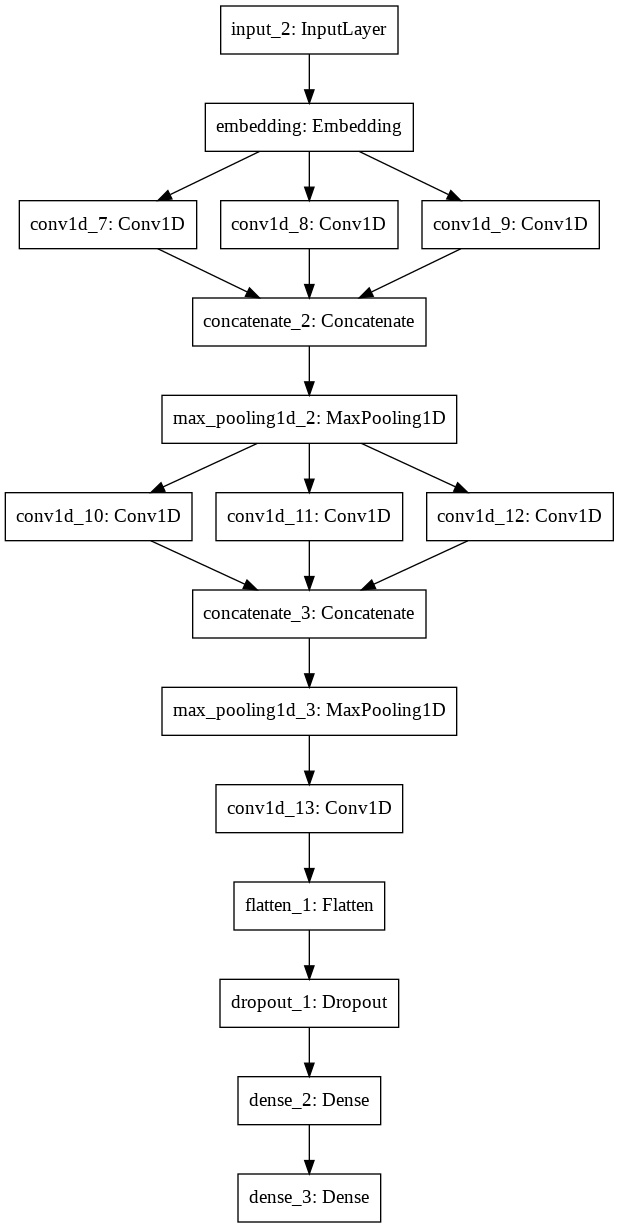

In [ ]:
# plot graph
plot_model(model, to_file='MODEL_1.png')

<h1>MODEL-2 Plot Graph<h1>

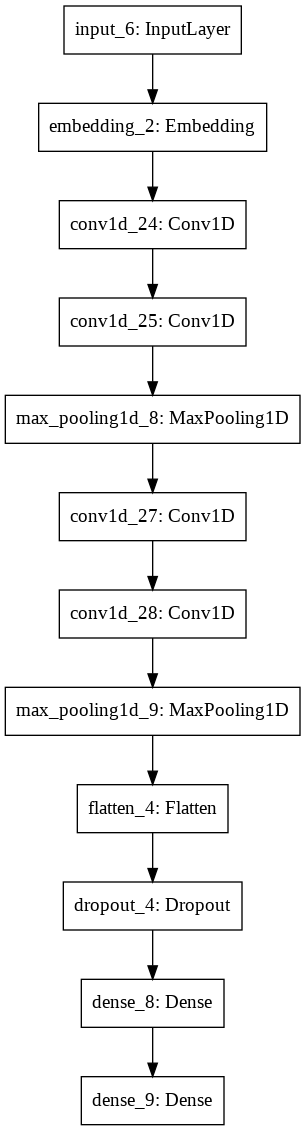

In [ ]:
# plot graph
plot_model(model, to_file='MODEL_2.png')